In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

This notebook to show how to display some results about inference in BN with pyAgrum

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
bn=gum.loadBN("../resources/alarm.dsl")
gnb.showBN(bn,size="7")

It is easy to get a posterior from an inference engine :

In [3]:
ie=gum.LazyPropagation(bn)

In [4]:
ie.makeInference()
print(ie.posterior(bn.idFromName("CATECHOL")))

<CATECHOL:NORMAL> :: 0.0511754 /<CATECHOL:HIGH> :: 0.948825


A graphical visualisation of the distribution is easy as well :

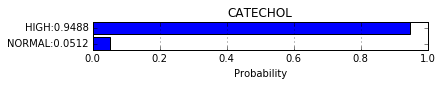

In [5]:
gnb.showPosterior(bn,{},'CATECHOL')

To have a <em>global</em> view of the knowledge brought by the inference, one can for instance draw the entropy of all nodes.

In [6]:
gnb.showInference(bn,ie,size="9")

.. and then observe the impact of an evidence on the whole bayes network :

In [7]:
ie.eraseAllEvidence()
ie.addHardEvidence(bn.idFromName("CO"),0)
ie.makeInference()
gnb.showInference(bn,ie,size="9")

<H1>Access to junction tree</H1>

It is well known that Lazy Propagation uses a junction tree to propagate information. How does it look for this BN ?

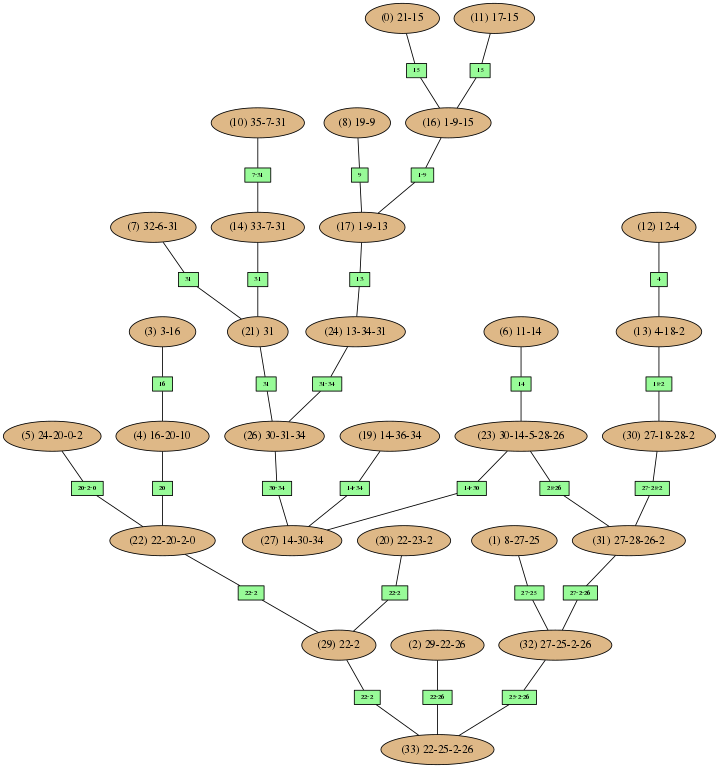

In [8]:
jt=ie.junctionTree()
gnb.showJunctionTree(bn,size="8")

This actually is a binary joint tree. See below.

In [9]:
for n in jt.ids():
    print([bn.variable(n).name() for n in jt.clique(n)])

['CVP', 'LVEDVOLUME']
['FIO2', 'VENTALV', 'PVSAT']
['ARTCO2', 'EXPCO2', 'VENTLUNG']
['VENTMACH', 'MINVOLSET']
['VENTMACH', 'DISCONNECT', 'VENTTUBE']
['PRESS', 'KINKEDTUBE', 'INTUBATION', 'VENTTUBE']
['ANAPHYLAXIS', 'TPR']
['HRBP', 'ERRLOWOUTPUT', 'HR']
['LVFAILURE', 'HISTORY']
['HREKG', 'HR', 'ERRCAUTER']
['PCWP', 'LVEDVOLUME']
['PAP', 'PULMEMBOLUS']
['SHUNT', 'INTUBATION', 'PULMEMBOLUS']
['HRSAT', 'HR', 'ERRCAUTER']
['HYPOVOLEMIA', 'LVFAILURE', 'LVEDVOLUME']
['HYPOVOLEMIA', 'STROKEVOLUME', 'LVFAILURE']
['CO', 'BP', 'TPR']
['INTUBATION', 'VENTLUNG', 'MINVOL']
['HR']
['KINKEDTUBE', 'INTUBATION', 'VENTTUBE', 'VENTLUNG']
['ARTCO2', 'SAO2', 'INSUFFANESTH', 'CATECHOL', 'TPR']
['CO', 'STROKEVOLUME', 'HR']
['CO', 'CATECHOL', 'HR']
['CO', 'TPR', 'CATECHOL']
['INTUBATION', 'VENTLUNG']
['INTUBATION', 'SHUNT', 'PVSAT', 'SAO2']
['INTUBATION', 'ARTCO2', 'PVSAT', 'SAO2']
['ARTCO2', 'VENTALV', 'INTUBATION', 'PVSAT']
['VENTALV', 'INTUBATION', 'ARTCO2', 'VENTLUNG']


In [10]:
for e in jt.edges():
    print("Separator for {0} : {1}".
          format(e,
                 jt.clique(e[0]).intersection(jt.clique(e[1]))))

Separator for (19, 27) : {34, 14}
Separator for (3, 4) : {16}
Separator for (30, 31) : {2, 27, 28}
Separator for (29, 33) : {2, 22}
Separator for (7, 21) : {31}
Separator for (1, 32) : {25, 27}
Separator for (6, 23) : {14}
Separator for (4, 22) : {20}
Separator for (32, 33) : {25, 2, 26}
Separator for (12, 13) : {4}
Separator for (13, 30) : {18, 2}
Separator for (0, 16) : {15}
Separator for (23, 31) : {26, 28}
Separator for (23, 27) : {14, 30}
Separator for (21, 26) : {31}
Separator for (5, 22) : {0, 2, 20}
Separator for (11, 16) : {15}
Separator for (17, 24) : {13}
Separator for (22, 29) : {2, 22}
Separator for (24, 26) : {34, 31}
Separator for (26, 27) : {34, 30}
Separator for (31, 32) : {27, 26, 2}
Separator for (8, 17) : {9}
Separator for (16, 17) : {1, 9}
Separator for (2, 33) : {26, 22}
Separator for (10, 14) : {7, 31}
Separator for (20, 29) : {2, 22}
Separator for (14, 21) : {31}


In [11]:
jt.hasRunningIntersection()

True

<H1>Junction Tree and Binary Join Tree</H1>

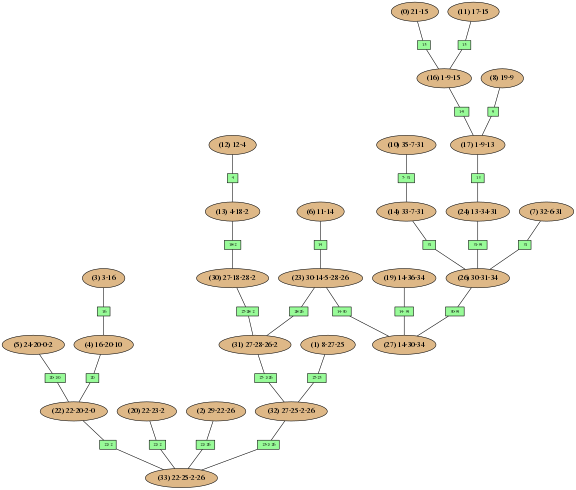

In [12]:
jtg=gum.JTGenerator()
gnb.showDot(jtg.junctionTree(bn).toDot(),size="6")

A Binary Join Tree is a junction tree that verifies that no clique has more than 3 parents.

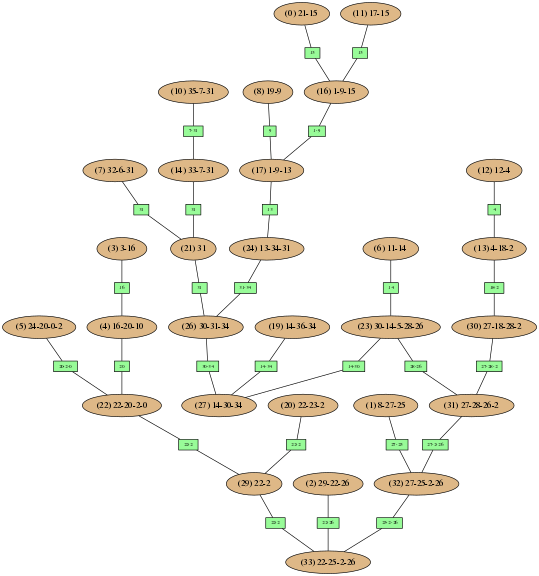

In [13]:
gnb.showDot(jtg.binaryJoinTree(bn).toDot(),size="6")